In [ ]:
# setup Colabs
!pip install brian2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00


In [2]:
import cupy as cp

In [12]:
arr = cp.arange(6)
print(arr.shape)
cp.random.choice(arr, 3, replace=False)

(6,)


array([1, 3, 2])

In [3]:
from brian2 import *
#import brian2cuda
from models import StructuralPlasticityModel

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#clear_cache('cython')

In [63]:
from models import StructuralPlasticityModel
model = StructuralPlasticityModel(order=100, V_th=19.9*mV, delta_T_s=1*second, g=8, tau_ca=5*second,enable_plasticity=True)
model.run(600*second)
mon = SpikeMonitor(model.E)
model.network.add(mon)
#model.run(80*ms)

S_I_I:  <S_I_I.N: 1030>
S_I_E:  <S_I_E.N: 3998>
S_E_I:  <S_E_I.N: 3937>
Starting simulation at t=0. s for a duration of 0.6 ks
21.3555 s (3%) simulated in 20s, estimated 9m 2s remaining.
45.0001 s (7%) simulated in 40s, estimated 8m 13s remaining.
68.5971 s (11%) simulated in 1m 0s, estimated 7m 45s remaining.
93.0001 s (15%) simulated in 1m 20s, estimated 7m 18s remaining.
115.0001 s (19%) simulated in 1m 40s, estimated 7m 4s remaining.
139.6509 s (23%) simulated in 2m 0s, estimated 6m 37s remaining.
164.0001 s (27%) simulated in 2m 20s, estimated 6m 14s remaining.
188.4131 s (31%) simulated in 2m 40s, estimated 5m 51s remaining.
209.7153 s (34%) simulated in 3m 8s, estimated 5m 51s remaining.
233.5582 s (38%) simulated in 3m 28s, estimated 5m 28s remaining.
258.0001 s (43%) simulated in 3m 49s, estimated 5m 4s remaining.
282.6594 s (47%) simulated in 4m 9s, estimated 4m 40s remaining.
306.0001 s (51%) simulated in 4m 29s, estimated 4m 19s remaining.
0.3310001 ks (55%) simulated in 4m

In [26]:
plot(mon.t/ms, mon.i, '.k')

NameError: name 'mon' is not defined

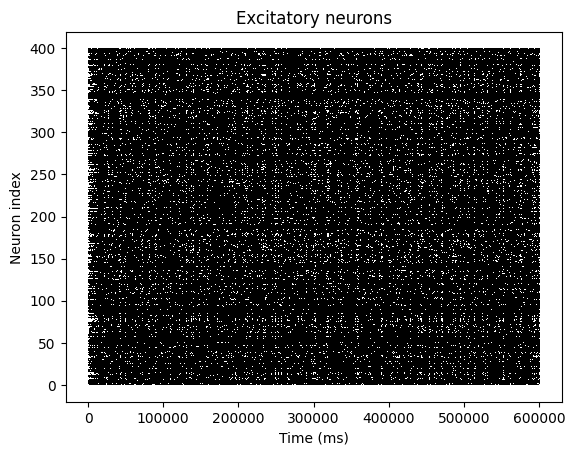

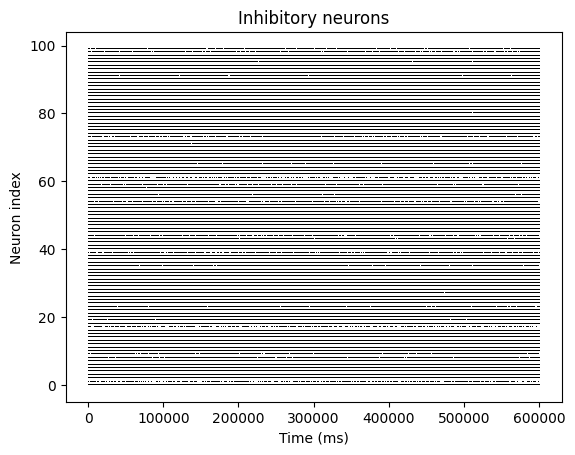

In [64]:
model.plot()

In [10]:
model = StructuralPlasticityModel(order=1)

Debug4
S_I_I:  <S_I_I.N: 0>
S_I_E:  <S_I_E.N: 0>
S_E_I:  <S_E_I.N: 0>


In [48]:
import cupy as cp
model = StructuralPlasticityModel(order=1, V_th=19.9*mV, delta_T_s=1*second, g=4, tau_ca=5*second,enable_plasticity=True)
#create a connectivity matrix dummy with random values between 0 and 3 5x5 
c = cp.random.randint(0, 3, size=(model.N_E, model.N_E))
# create a a and d dummy with random values between 0 and 3 5x1
a = cp.random.randint(0, 3, size=(model.N_E)).astype(int)
d = cp.random.randint(0, 3, size=(model.N_E)).astype(int)
a = cp.minimum(a, np.sum(c, axis=1))


S_I_I:  <S_I_I.N: 0>
S_I_E:  <S_I_E.N: 0>
S_E_I:  <S_E_I.N: 0>


In [49]:
print(c, a, d)
print(c.flatten().get())


model._repeated_hypergeometric(c.get().transpose(), a.get()).transpose()

[[0 1 1 1]
 [2 2 1 0]
 [0 0 0 1]
 [2 1 0 1]] [0 0 0 2] [1 0 2 0]
[0 1 1 1 2 2 1 0 0 0 0 1 2 1 0 1]
Deleting:  2
total_objects_before:  [3 5 1 4]
color:  [0 2 0 2] total_objects:  [3 3 1 2] nsamples:  [0 0 0 2]
removed_colors:  [0 0 0 1]
total_objects_before:  [3 3 1 2]
color:  [1 2 0 1] total_objects:  [2 1 1 1] nsamples:  [0 0 0 1]
removed_colors:  [0 0 0 0]
total_objects_before:  [2 1 1 1]
color:  [1 1 0 0] total_objects:  [1 0 1 1] nsamples:  [0 0 0 1]
removed_colors:  [0 0 0 0]
total_objects_before:  [1 0 1 1]
color:  [1 0 1 1] total_objects:  [0 0 0 0] nsamples:  [0 0 0 1]
removed_colors:  [0 0 0 1]


array([[0, 1, 1, 1],
       [2, 2, 1, 0],
       [0, 0, 0, 1],
       [1, 1, 0, 0]])

array([], dtype=float64)

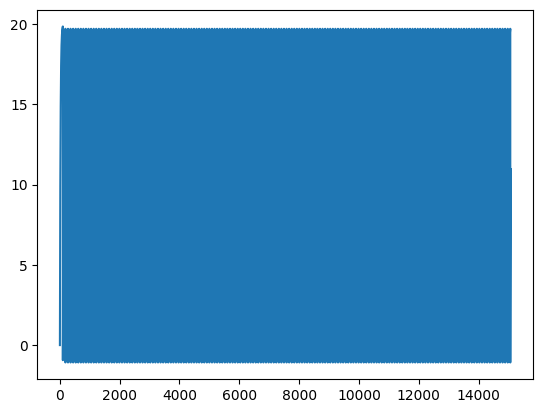

In [19]:
plot(model.M2.t/ms, model.M2.V[0]/mV)
(model.M2.V[0]/mV)[model.M2.V[0]/mV>19.9]